## PFMC QC


**Objective**: Separate QC analysis of PFMC from Cai 2022 data

- **Developed by**: Mairi McClean

- **Computational Health Centre - Helmholtz Munich**

- ORIGINAL: v221205

### Load modules

In [2]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
entrypoints         0.4
executing           1.1.1
google              NA
h5py                3.6.0
hypergeom_ufunc     NA
igraph              0.10.2
ipykernel           6.16.2
ipywidgets          8.0.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.0
llvmlite            0.39.1
louvain             0.8.0
matplotlib          3.6.1
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.56.3
numexpr             2.8.1
numpy               1.23.4
packaging           21.3
pandas              1.5.1
parso       

### Read in dataset

In [4]:
adata = sc.read_h5ad('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/CaiY2022_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 223089 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [5]:
adata.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
...                                             ...        ...        ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   

                                             object       protocol  
barcode                                                             
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
...                                             ...            ...  
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  

[223089 rows x 10 columns]

### Separate PFMC and PBMC, and remove scTCRseq

In [6]:
adata.obs['data_type'].value_counts()

scRNAseq    146168
scTCRseq     76921
Name: data_type, dtype: int64

In [7]:
adata.obs['tissue'].value_counts()

PBMC    127097
PFMC     95992
Name: tissue, dtype: int64

In [8]:
adata_new = adata[~adata.obs['tissue'].isin(['PBMC']),:]
adata_new

View of AnnData object with n_obs × n_vars = 95992 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [9]:
adata_new.obs['tissue'].value_counts()

PFMC    95992
Name: tissue, dtype: int64

In [10]:
adata_new_2 = adata_new[~adata_new.obs['data_type'].isin(['scTCRseq']),:]

In [11]:
adata_new_2.obs['data_type'].value_counts()

scRNAseq    68269
Name: data_type, dtype: int64

In [12]:
adata_new_2.obs['tissue'].value_counts()

PFMC    68269
Name: tissue, dtype: int64

In [13]:
adata_new_2.var_names_make_unique()
sample_object = adata_new_2.copy()
sample_object

AnnData object with n_obs × n_vars = 68269 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

### Replace gene symbols

In [14]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

gene_id
gene_name                     
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1

In [15]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


### Inital scatterplot of top 20

normalizing counts per cell
    finished (0:00:00)


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


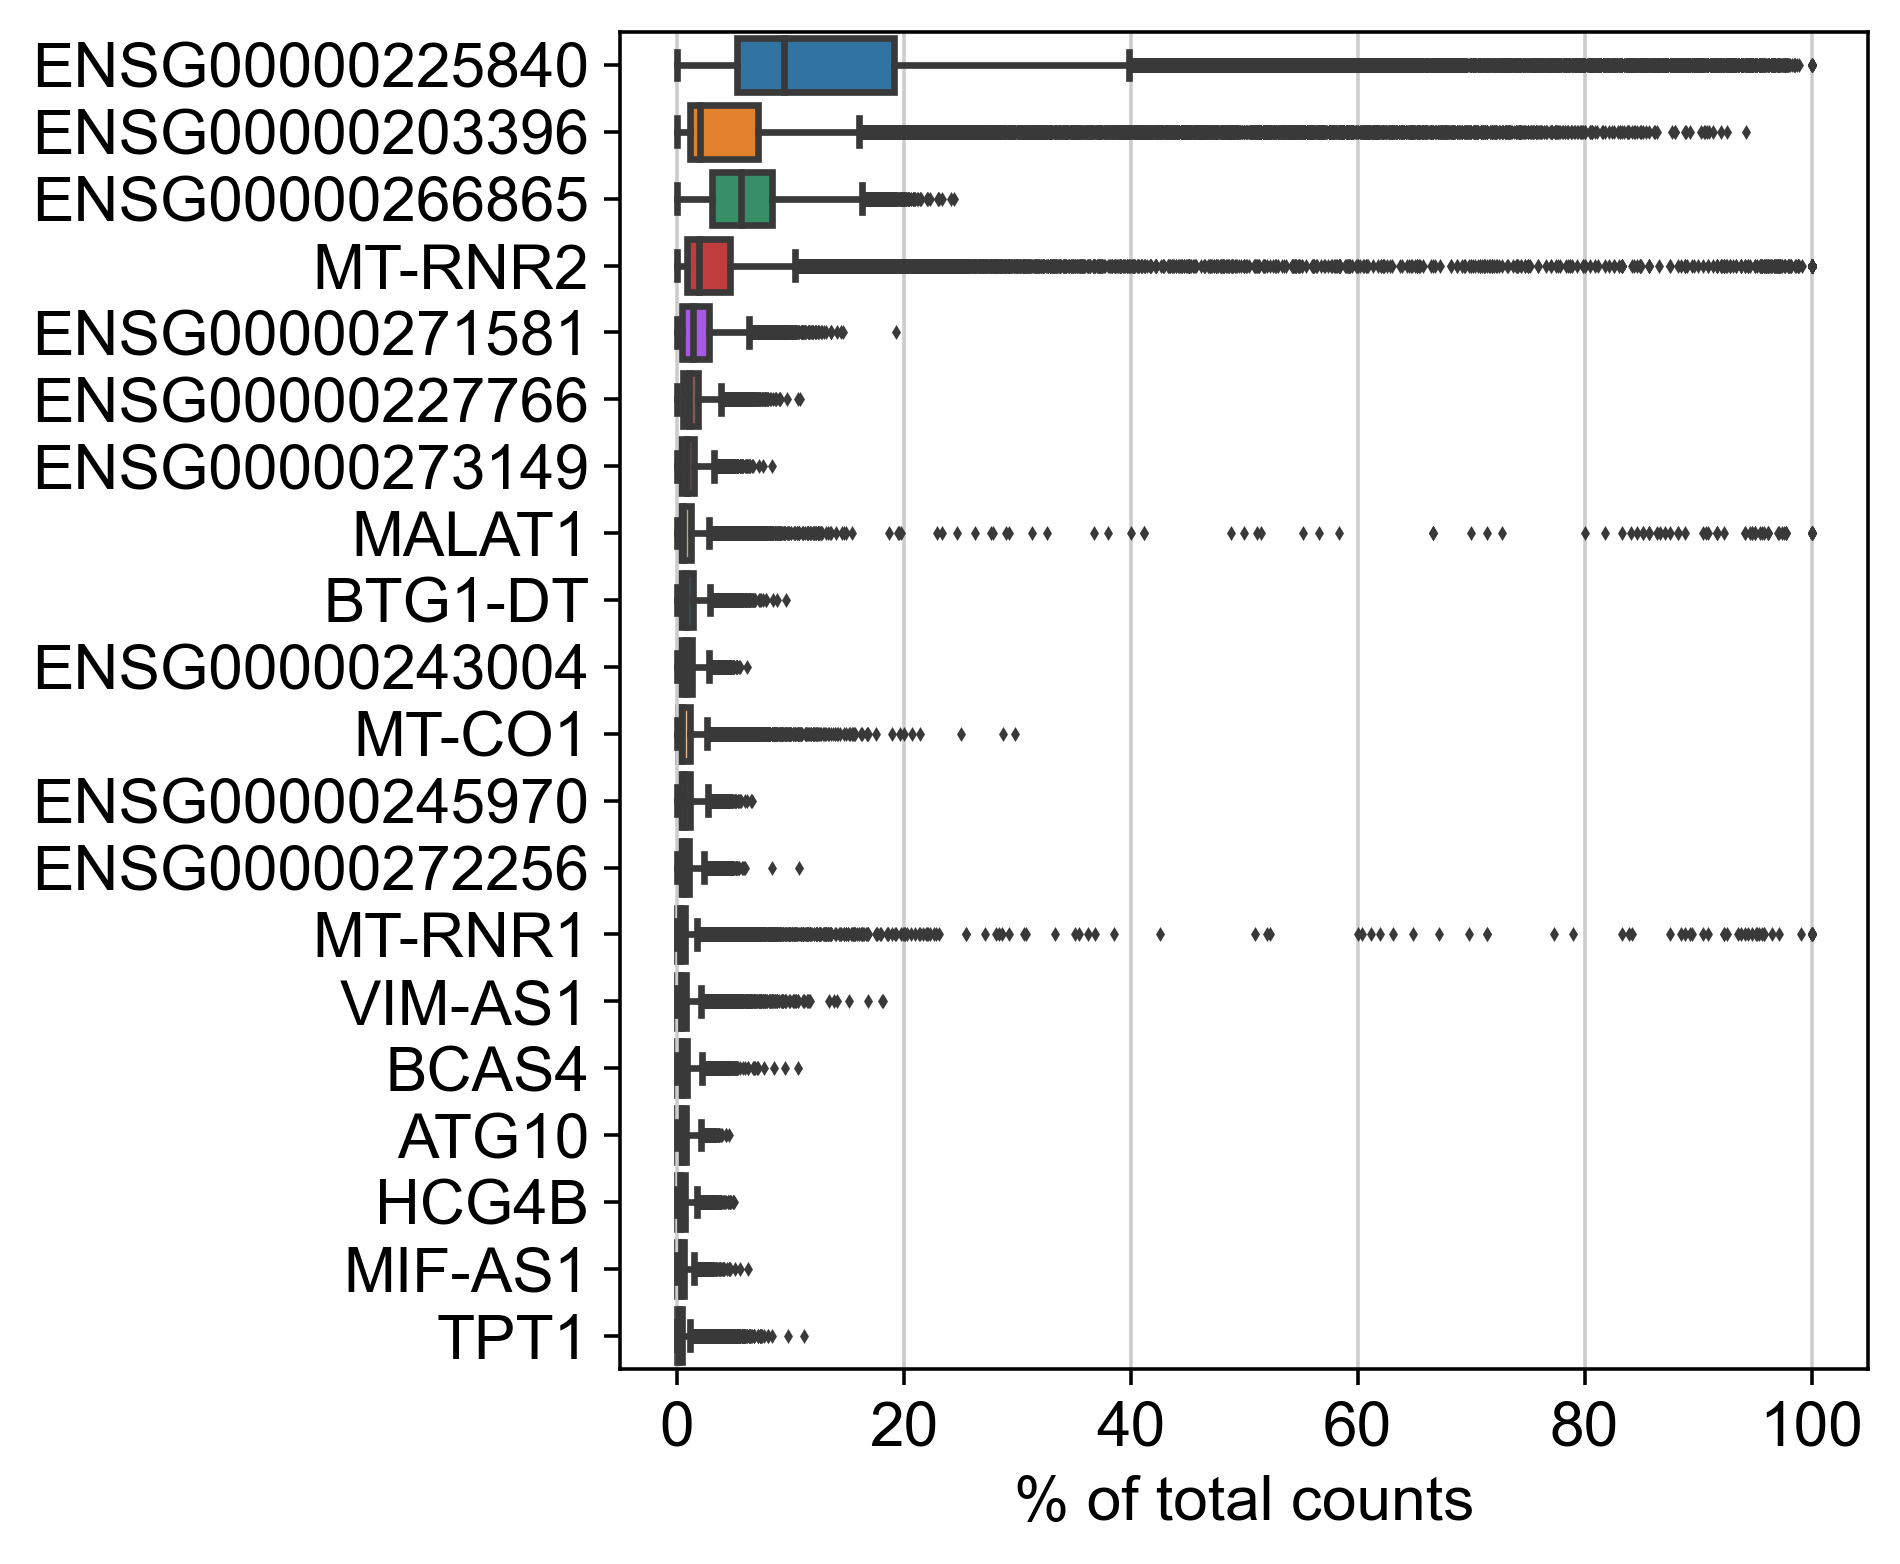

In [16]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Filter cells with less than 200 genes

In [17]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 27126 cells that have less than 200 genes expressed
41143 61533


In [18]:
sample_object.shape

(41143, 61533)

In [19]:
sample_object.var

gene_id
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1
...                        ...
MT-ND6       ENSG00000198695.2
MT-TE        ENSG00000210194.1
MT-CYB       ENSG00000198727.2
MT-TT        ENSG00000210195.2
MT-TP        ENSG00000210196.2

[61533 rows x 1 columns]

### Compute QC stats

In [20]:
sample_object.shape

(41143, 61533)

In [21]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var

gene_id     mt   ribo
DDX11L1      ENSG00000223972.5  False  False
WASH7P       ENSG00000227232.5  False  False
MIR6859-1    ENSG00000278267.1  False  False
MIR1302-2HG  ENSG00000243485.5  False  False
MIR1302-2    ENSG00000284332.1  False  False
...                        ...    ...    ...
MT-ND6       ENSG00000198695.2   True  False
MT-TE        ENSG00000210194.1   True  False
MT-CYB       ENSG00000198727.2   True  False
MT-TT        ENSG00000210195.2   True  False
MT-TP        ENSG00000210196.2   True  False

[61533 rows x 3 columns]

In [22]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo'], percent_top = None, log1p = False, inplace = True)

In [23]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('MT-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1).A1

In [24]:
sample_object

AnnData object with n_obs × n_vars = 41143 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Visualise QC metrics

In [25]:
sample_object.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'ENSG00000238009',
       ...
       'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', length=61533)

In [26]:
sample_object.var

gene_id     mt   ribo  n_cells_by_counts  mean_counts  \
DDX11L1      ENSG00000223972.5  False  False                  5     0.000122   
WASH7P       ENSG00000227232.5  False  False                 27     0.000656   
MIR6859-1    ENSG00000278267.1  False  False                  0     0.000000   
MIR1302-2HG  ENSG00000243485.5  False  False                  0     0.000000   
MIR1302-2    ENSG00000284332.1  False  False                  0     0.000000   
...                        ...    ...    ...                ...          ...   
MT-ND6       ENSG00000198695.2   True  False              18635     0.763799   
MT-TE        ENSG00000210194.1   True  False                740     0.019833   
MT-CYB       ENSG00000198727.2   True  False              22356     1.421360   
MT-TT        ENSG00000210195.2   True  False                 44     0.001069   
MT-TP        ENSG00000210196.2   True  False               3467     0.095059   

             pct_dropout_by_counts  total_counts  
DDX11L1                  99.987847           5.0  
WASH7P                   99.934375          27.0  
MIR6859-1               100.000000           0.0  
MIR1302-2HG             100.000000           0.0  
MIR1302-2               100.000000           0.0  
...                            ...           ...  
MT-ND6                   54.706754       31425.0  
MT-TE                    98.201395         816.0  
MT-CYB                   45.662689       58479.0  
MT-TT                    99.893056          44.0  
MT-TP                    91.573293        3911.0  

[61533 rows x 7 columns]

In [27]:
sample_object.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
...                                             ...        ...        ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   

                                             object       protocol  n_genes  \
barcode                                                                       
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      231   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      205   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      292   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      232   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      236   
...                                             ...            ...      ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      568   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq     1094   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      398   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      209   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      573   

                                          n_genes_by_counts  total_counts  \
barcode                                                                     
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq

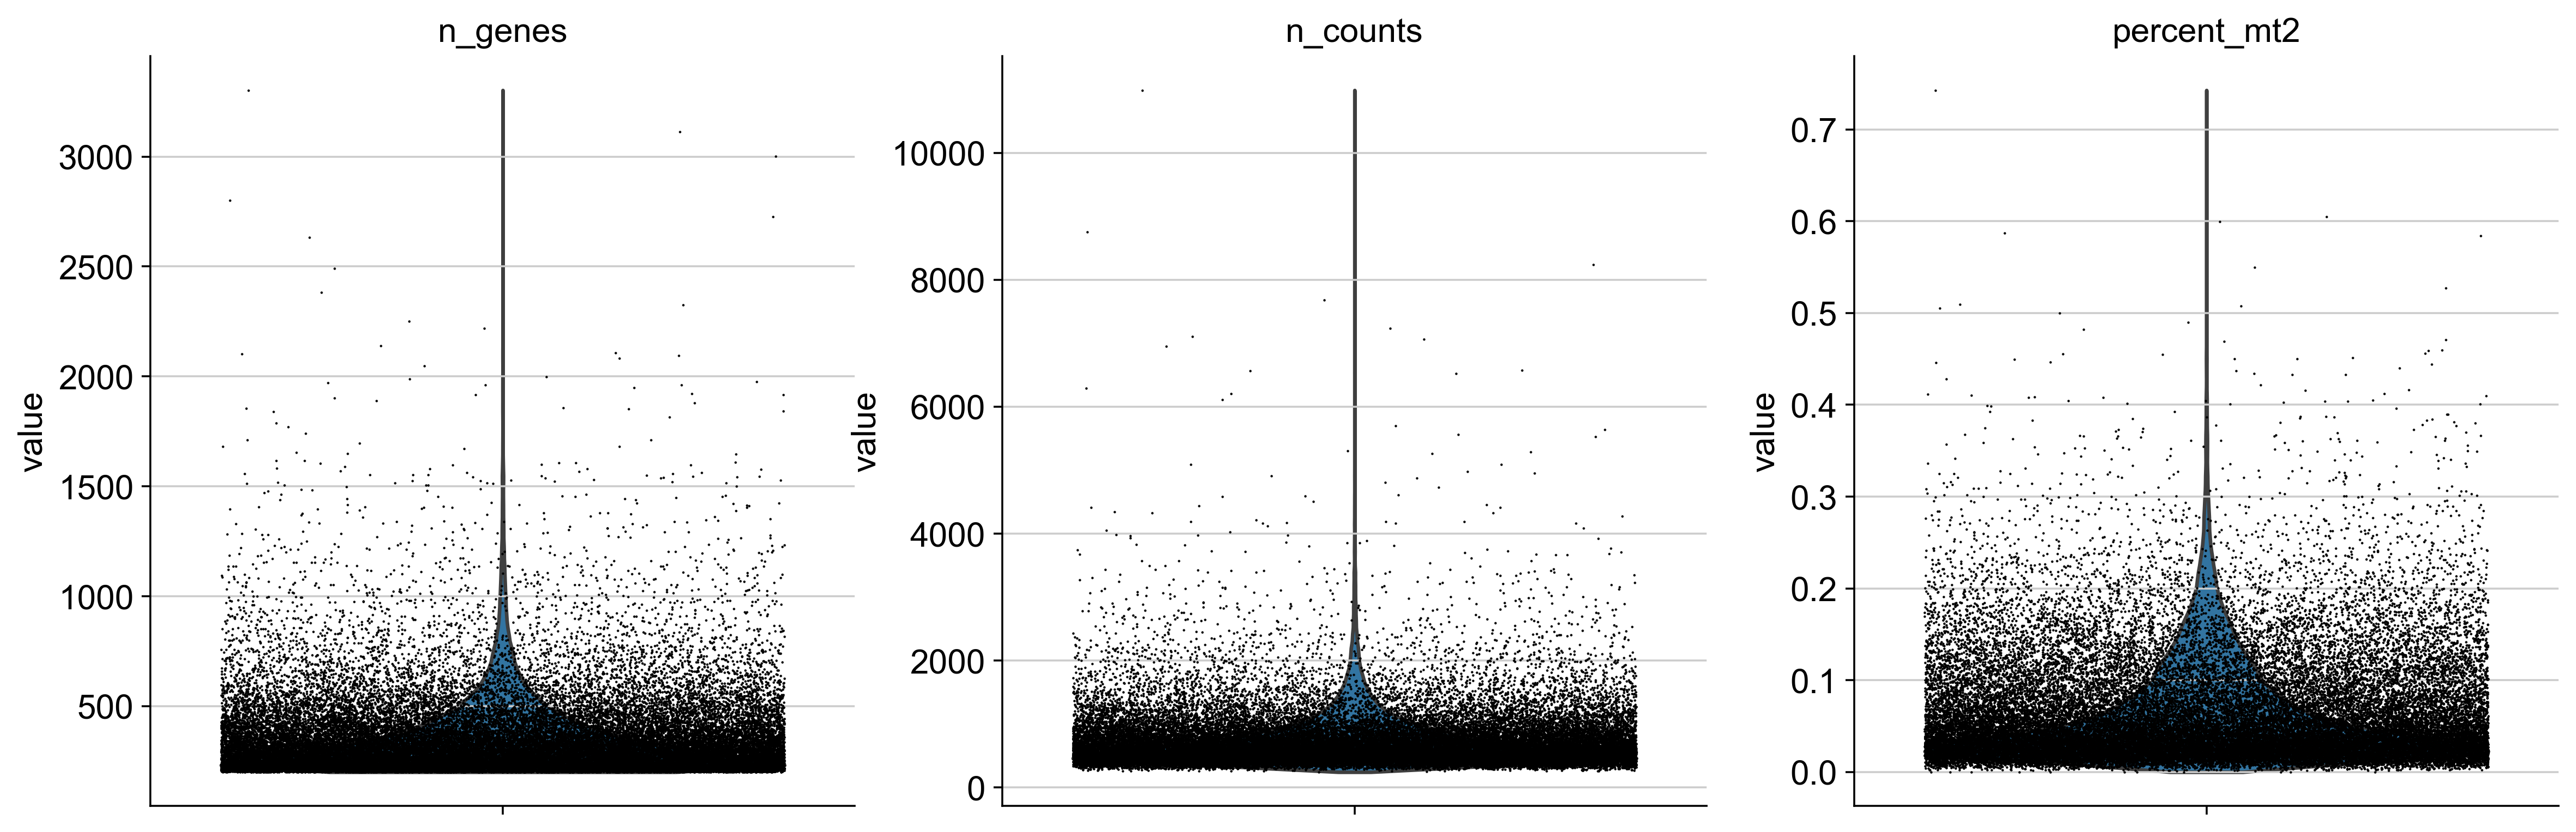

In [28]:
# This particular visualisation was from Anna's notebook; obs columns names not the same as Cai 2020 [these specific names were not found in the Cai20 adata.var nor adata.obs, but this code still worked?]
# No option to visualize ribosomal RNA?

sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2'],
             jitter=0.4, multi_panel=True)

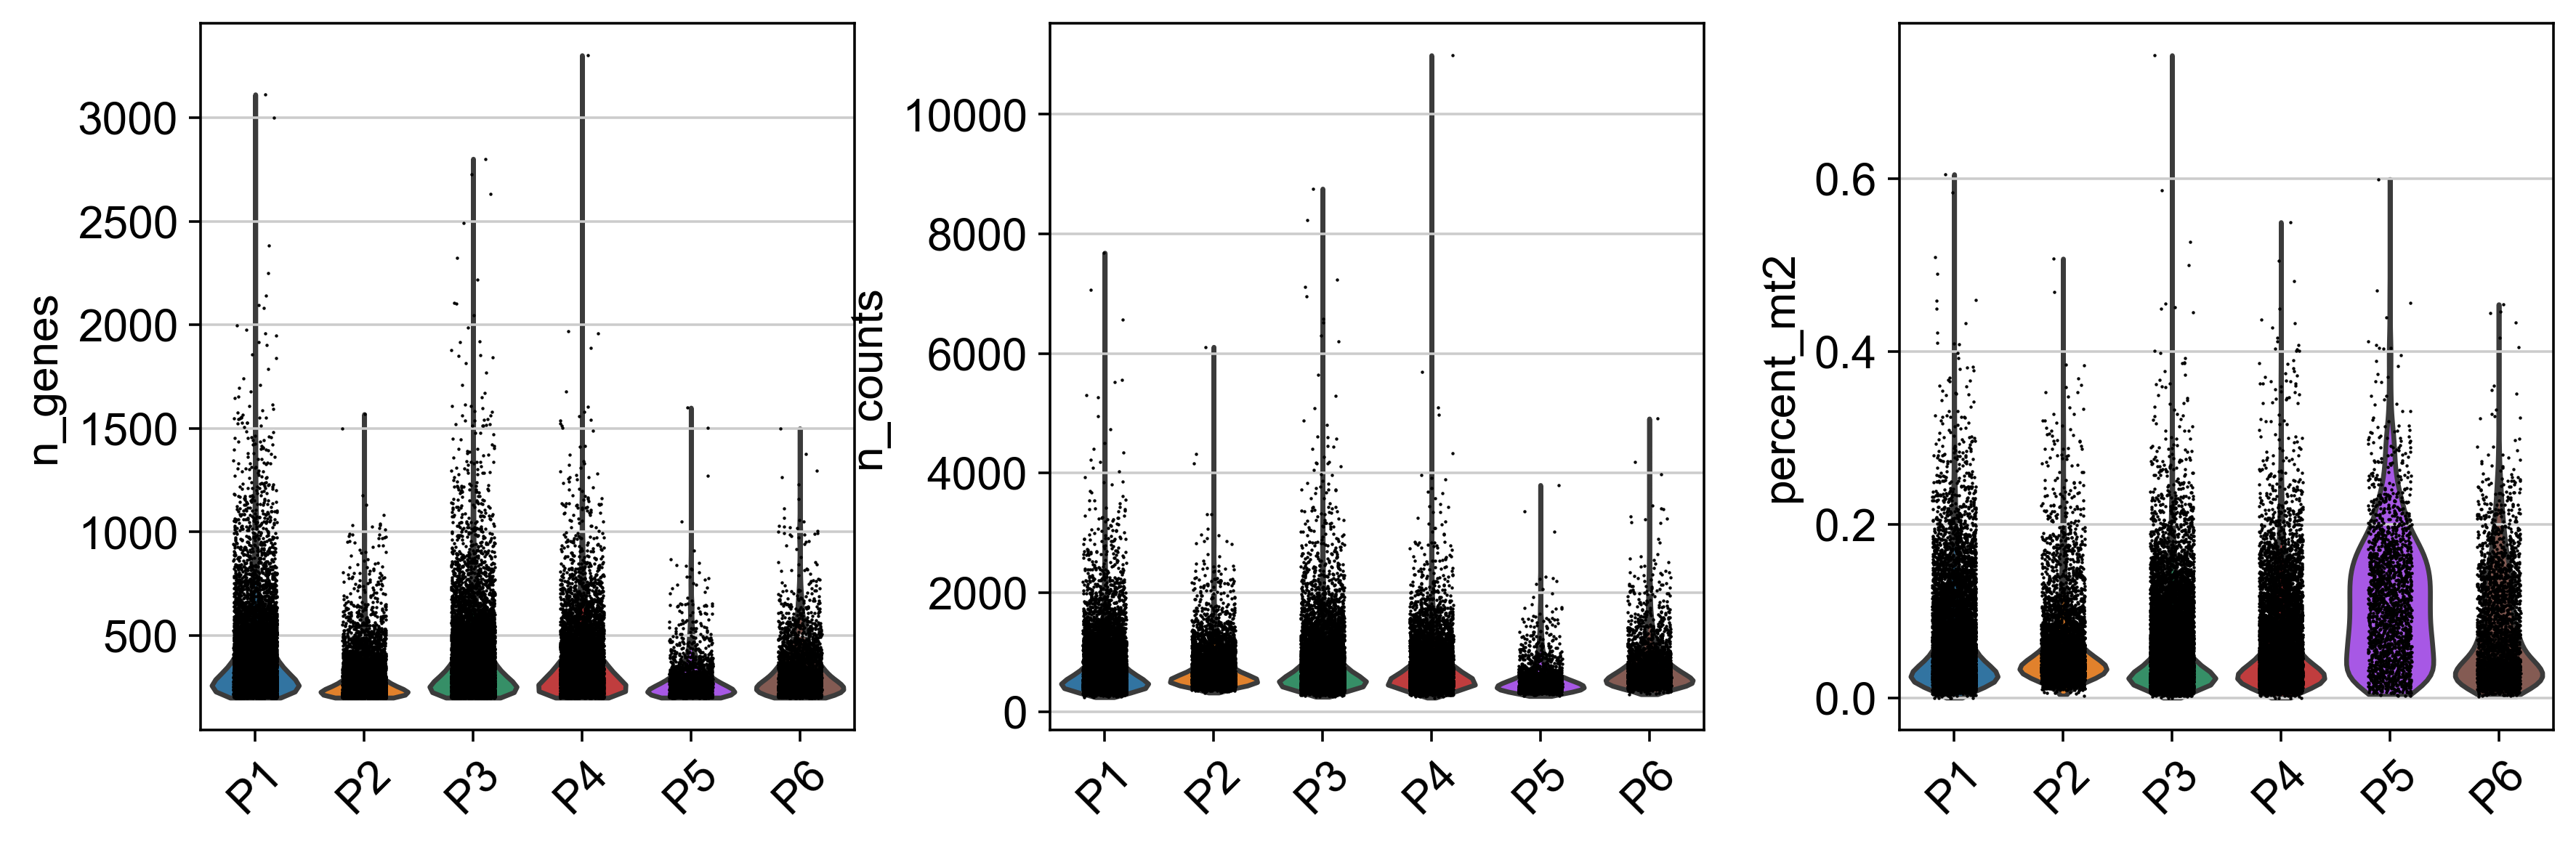

In [29]:
sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

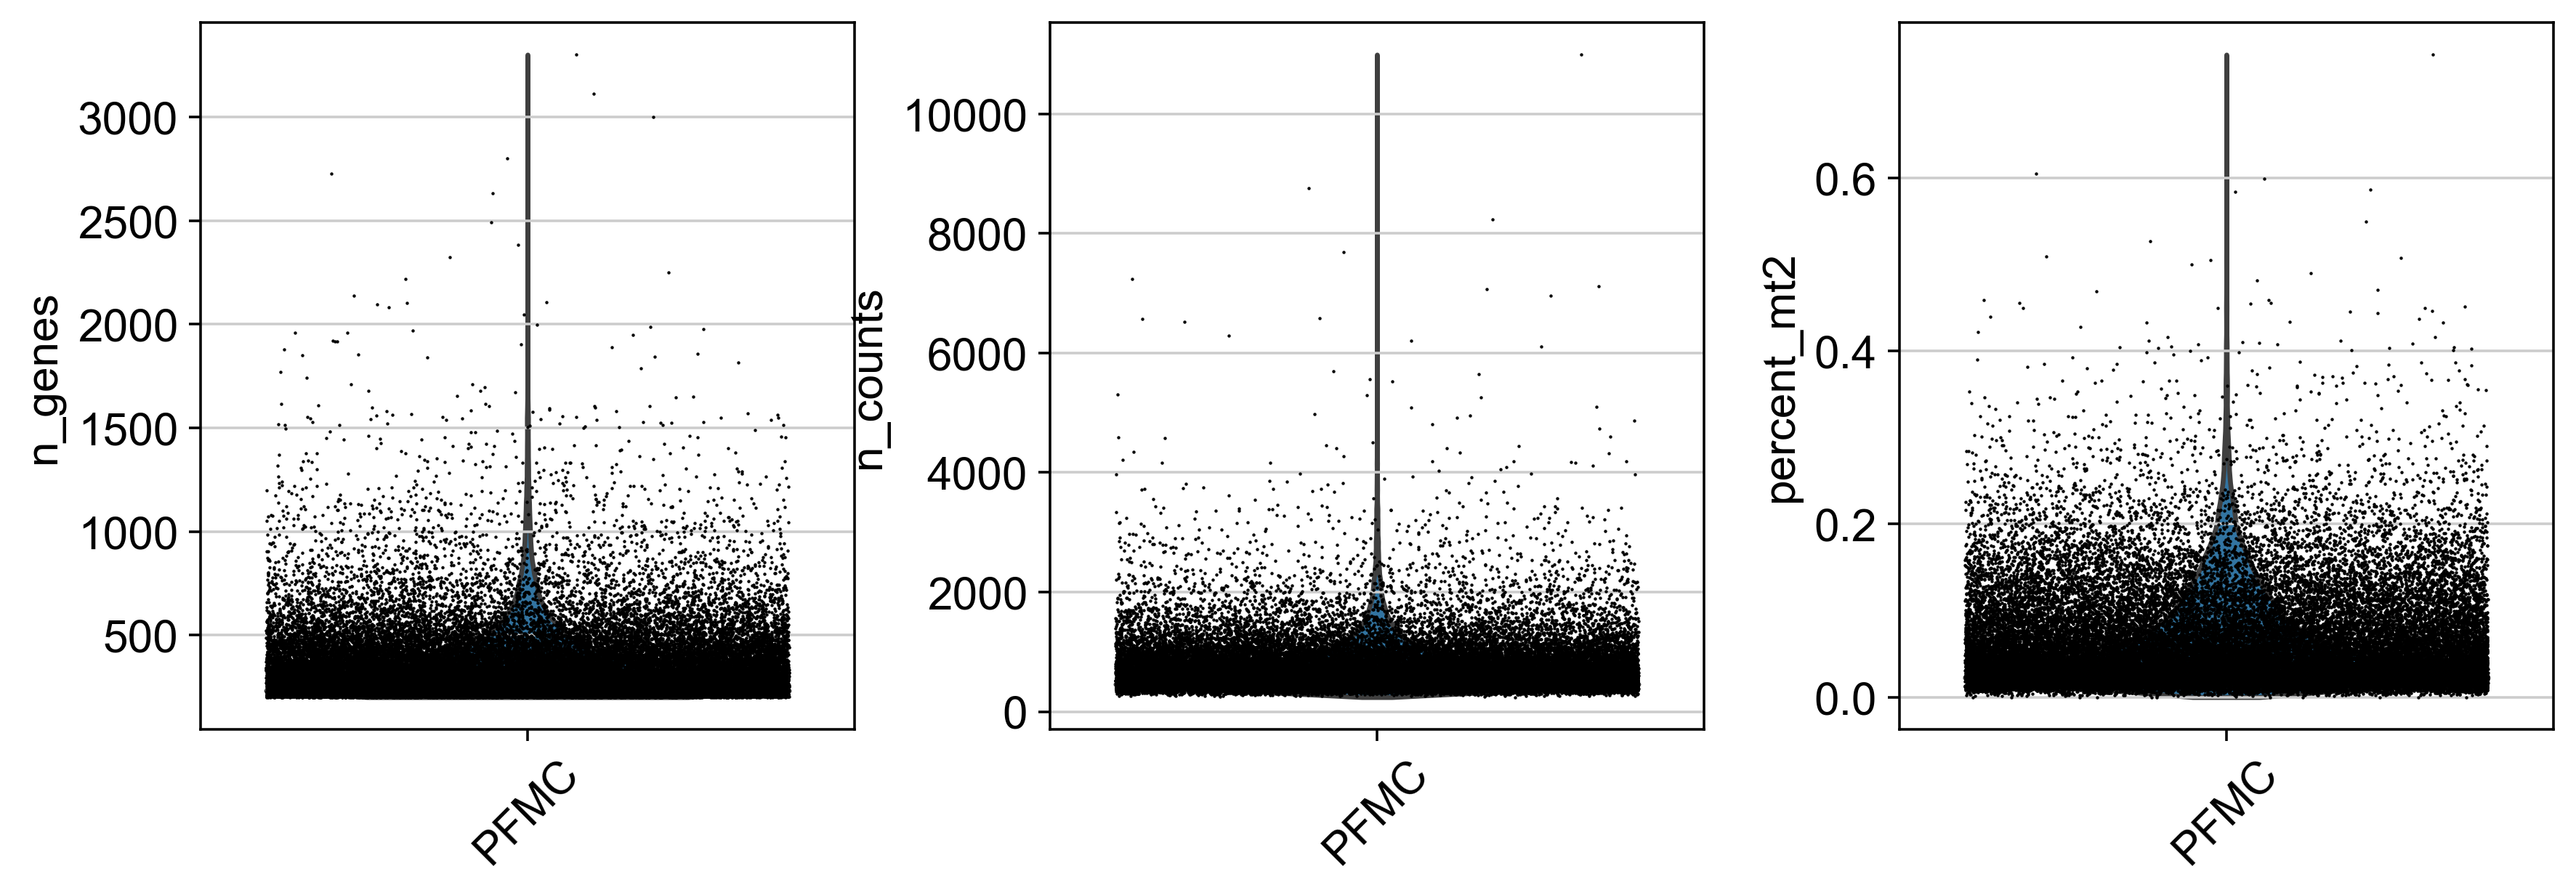

In [30]:
sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2'],
             jitter=0.4, groupby = 'tissue', rotation = 45)

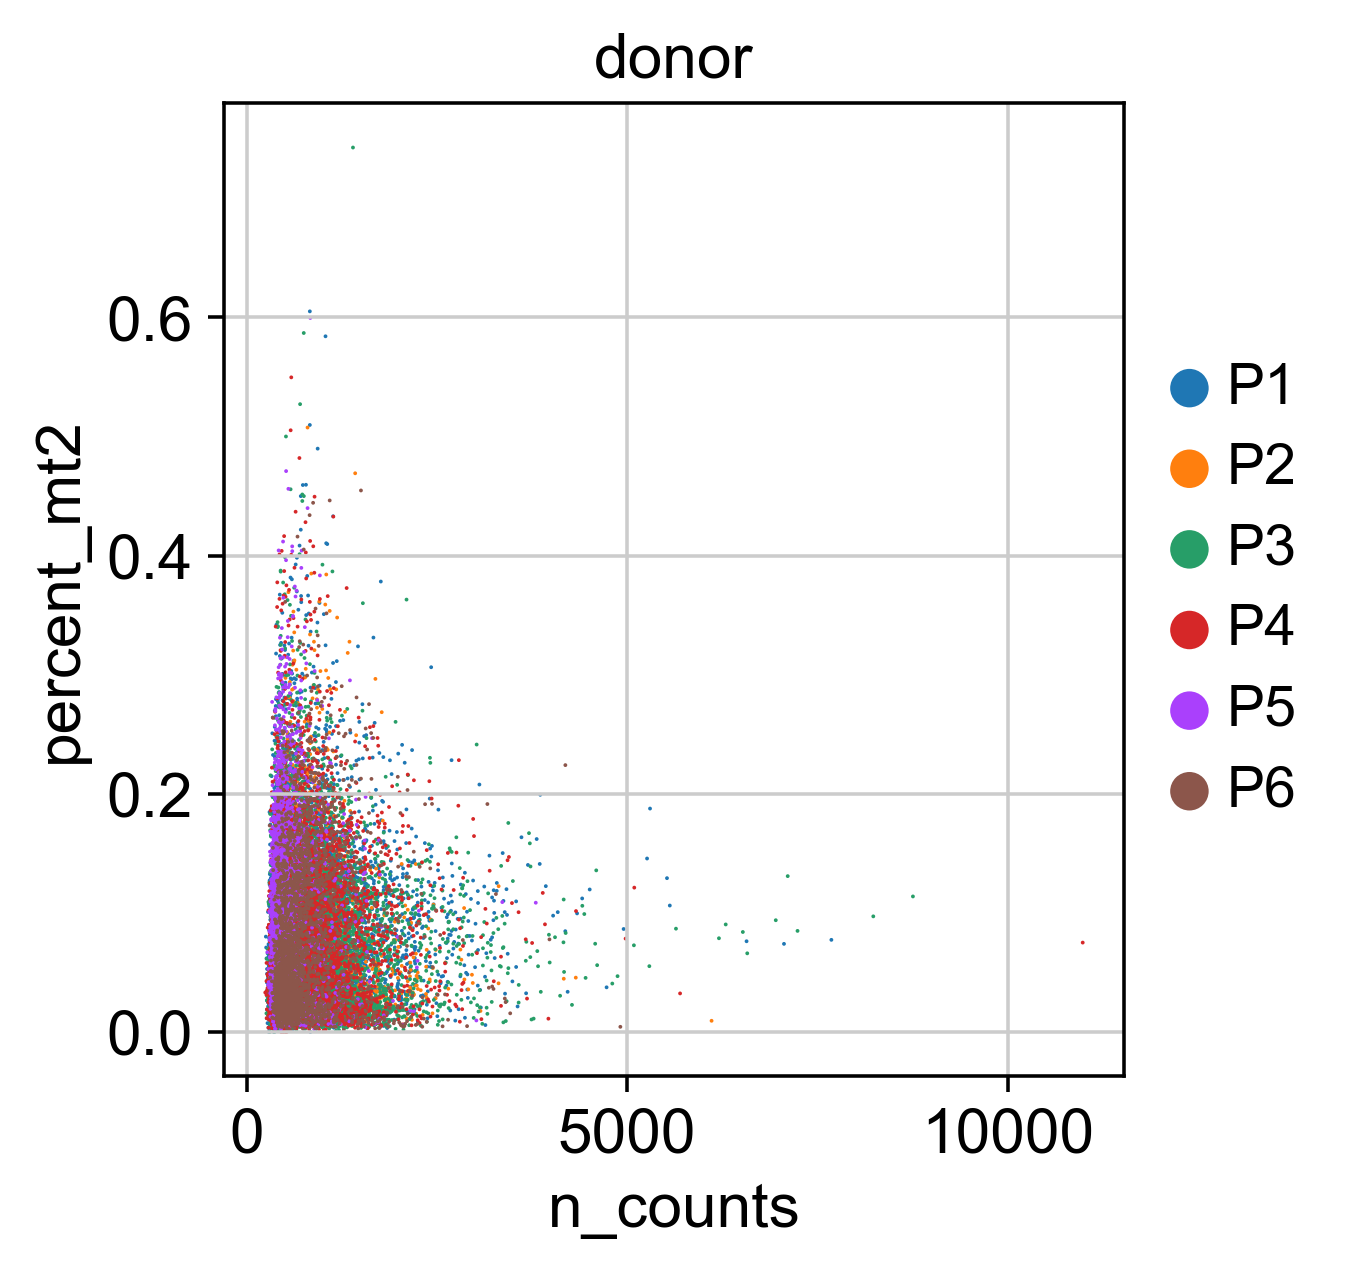

In [31]:
sc.pl.scatter(sample_object, x = 'n_counts', y = 'percent_mt2', color = "donor")

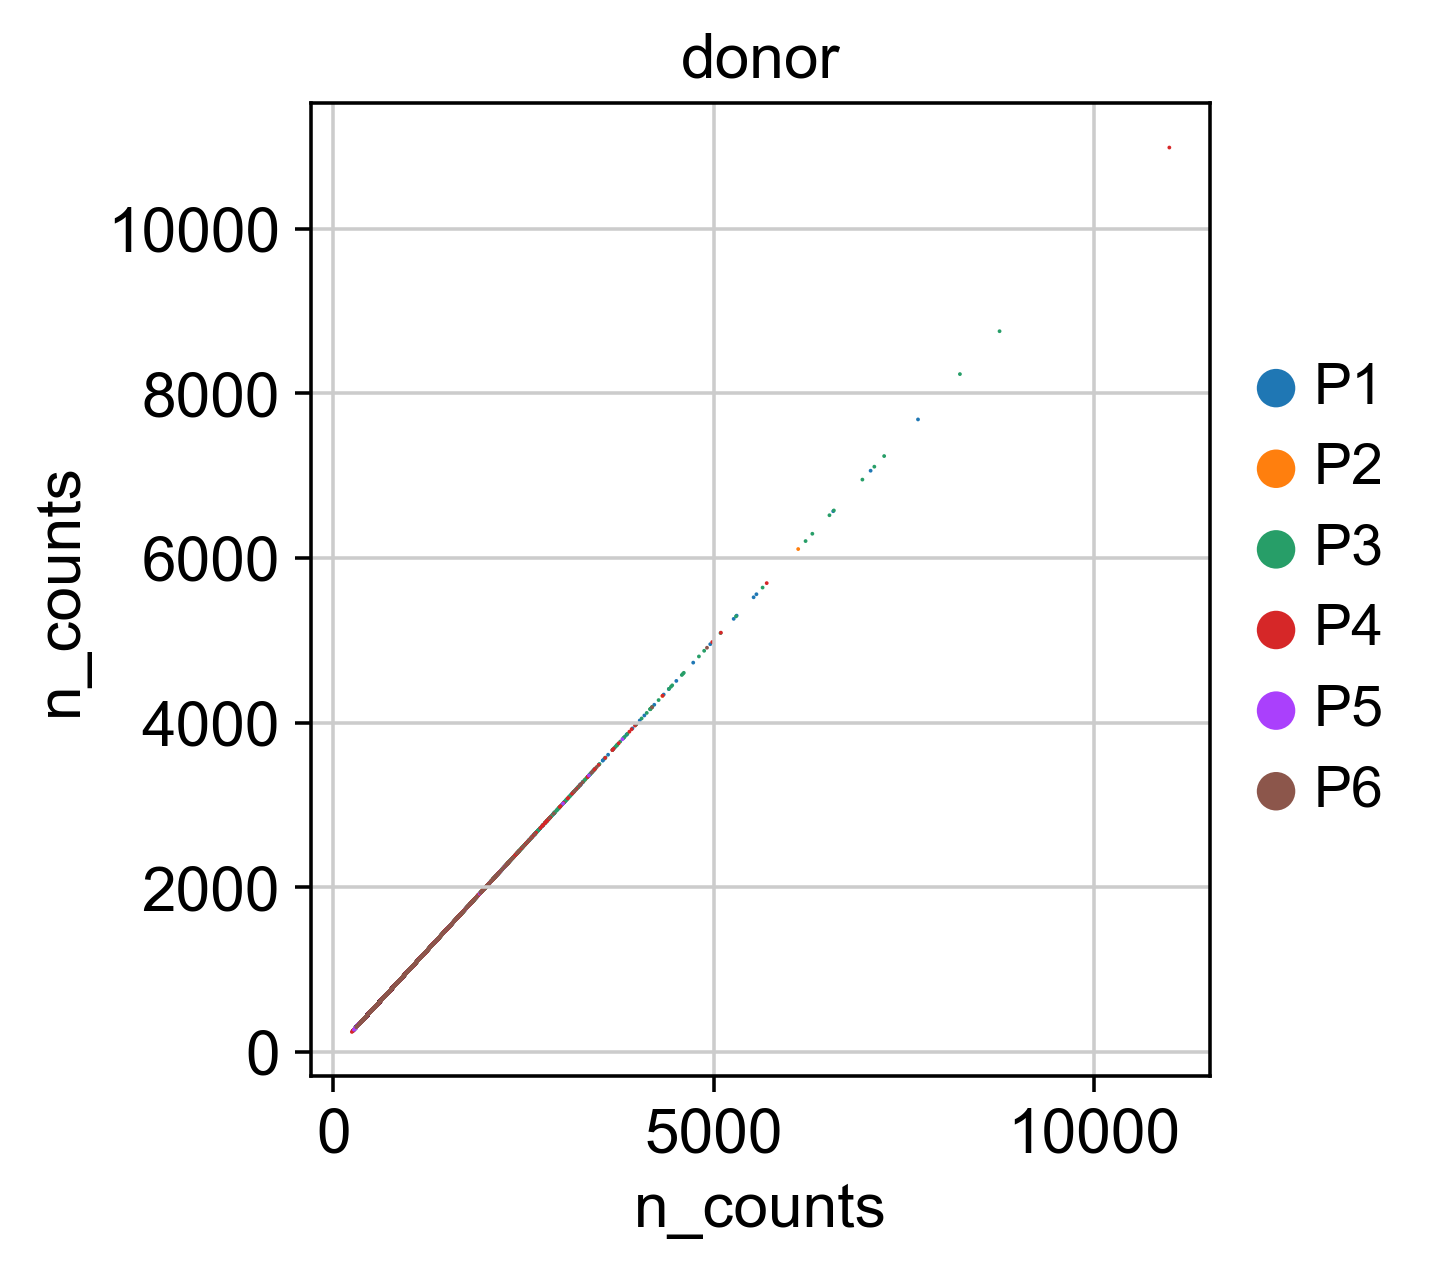

In [32]:
sc.pl.scatter(sample_object, x='n_counts', y='n_counts', color = "donor")

In [33]:
sample_object.obs


study individual     sample  \
barcode                                                                     
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
...                                             ...        ...        ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   

                                             object       protocol  n_genes  \
barcode                                                                       
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      231   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      205   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      292   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      232   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      236   
...                                             ...            ...      ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      568   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq     1094   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      398   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      209   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      573   

                                          n_genes_by_counts  total_counts  \
barcode                                                                     
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq

### Add sample sex covariate

In [34]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [35]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

In [36]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Y_RNA', 'SNORA70', 'XGY2', 'RNU6-1334P', 'SRY', 'RNASEH2CP1',
       'TOMM22P2', 'RPS4Y1', 'HSFY3P', 'NAP1L1P2',
       ...
       'PPP1R12BP1', 'RNU6-1314P', 'CYCSP48', 'ANKRD36P1', 'TPTE2P4',
       'CYCSP49', 'SLC25A15P1', 'PARP4P1', 'CCNQP2', 'CTBP2P1'],
      dtype='object', length=429)

In [37]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

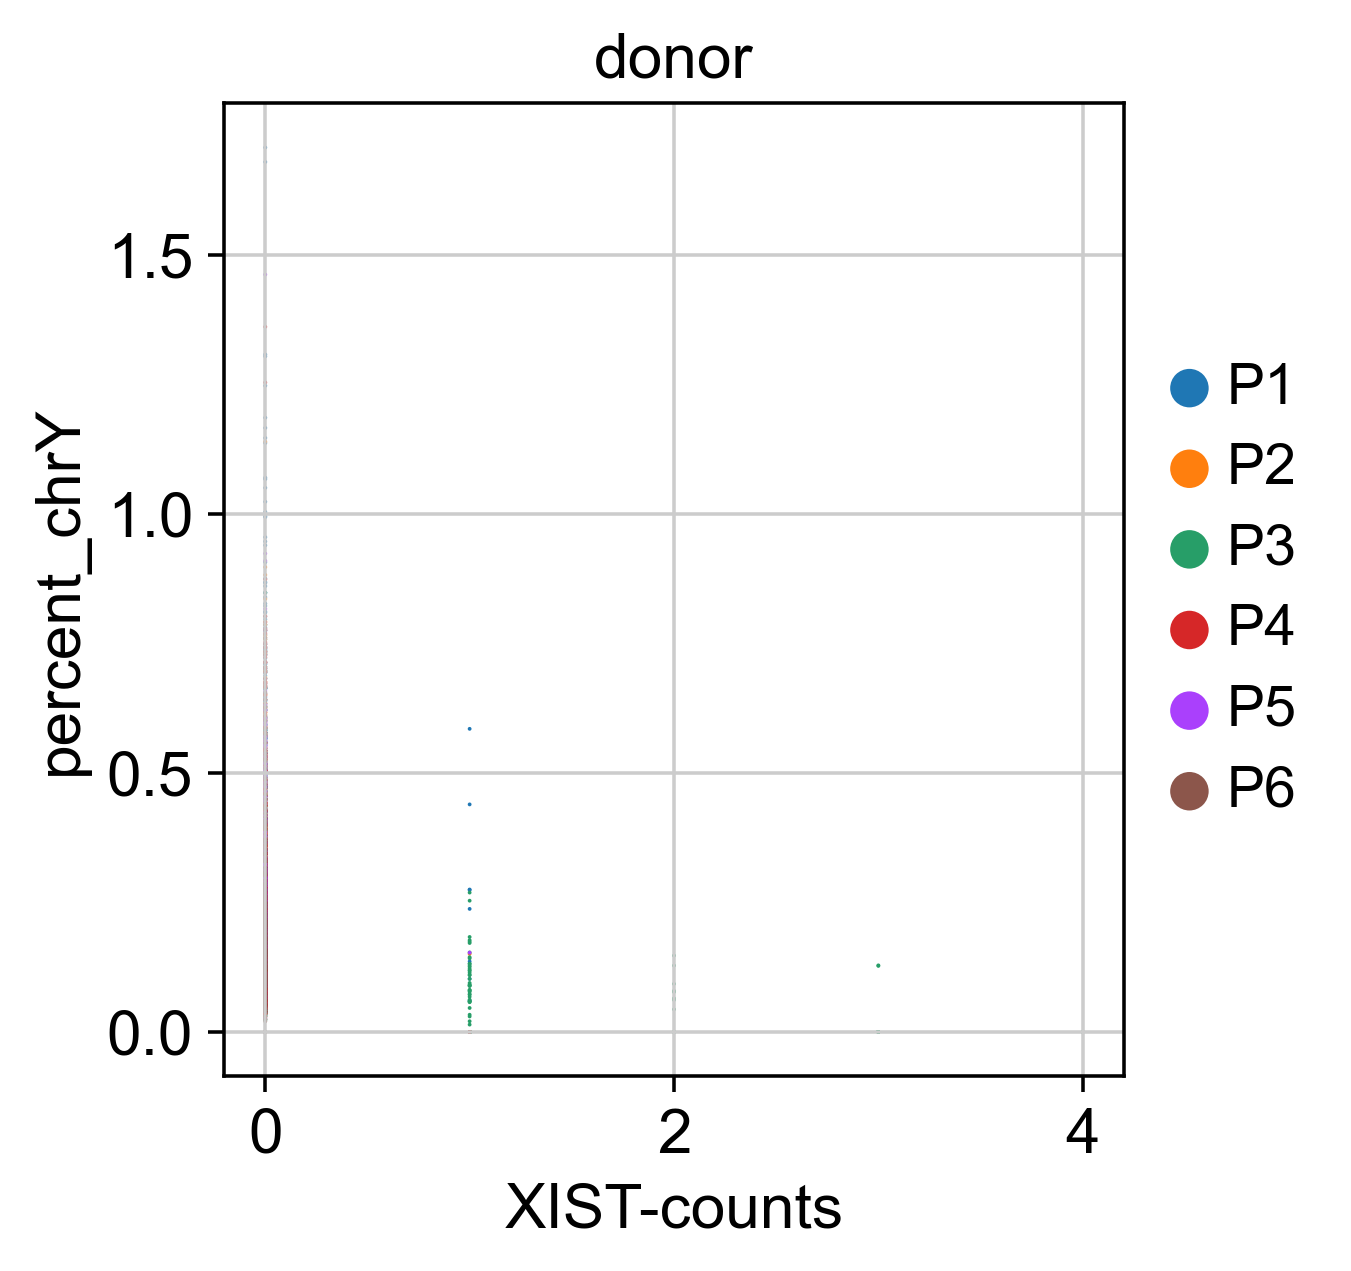

In [38]:
sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')].toarray()

sc.pl.scatter(sample_object, x = 'XIST-counts', y = 'percent_chrY', color = "donor")

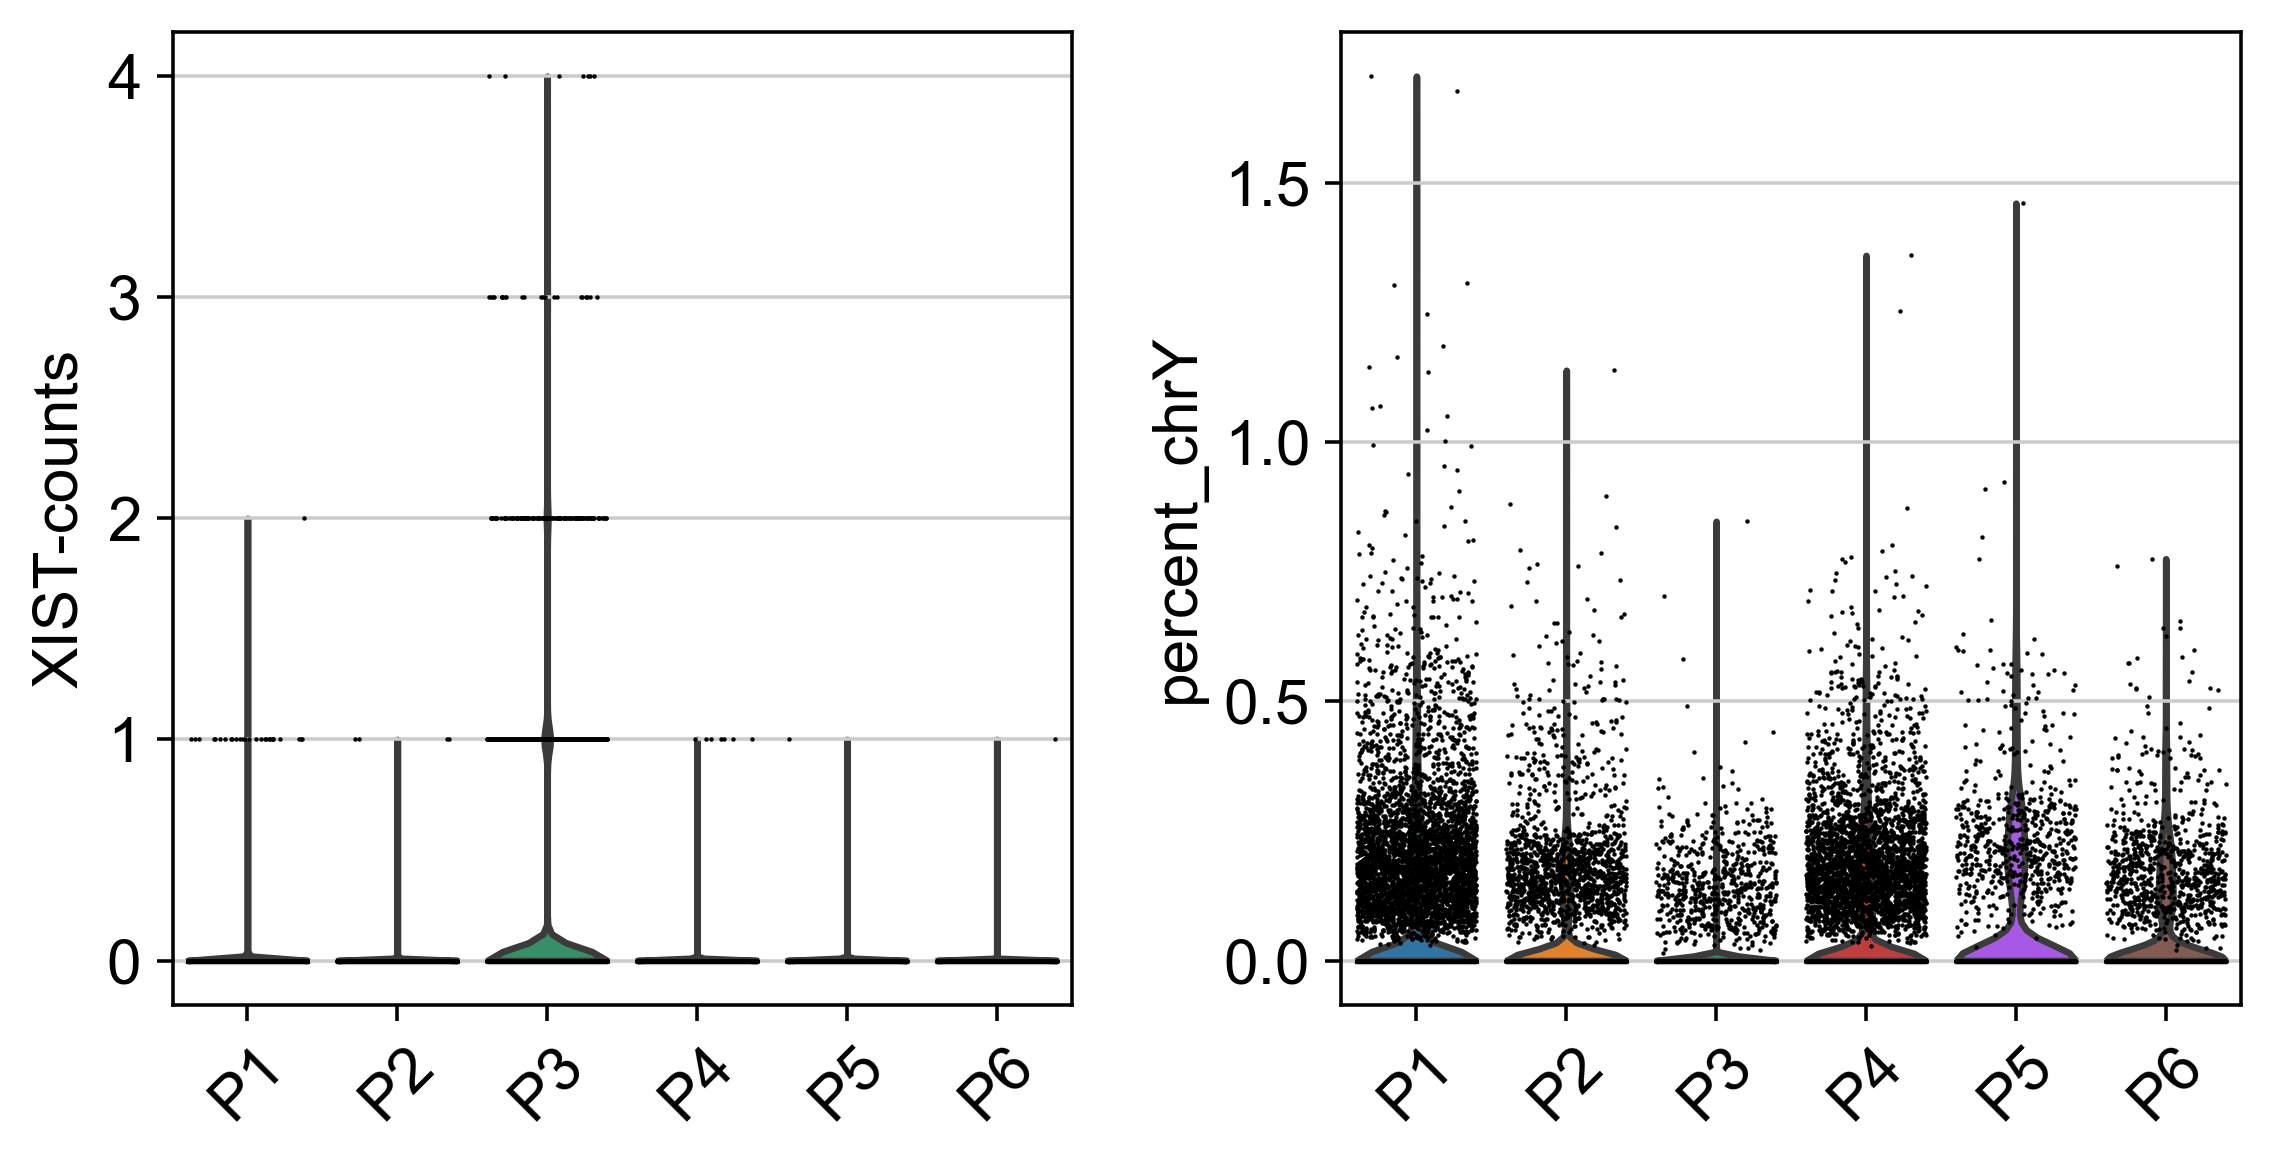

In [39]:
sc.pl.violin(sample_object, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Calculate cell cycle scores

In [40]:
!if [ ! -f /Users/mairi.mcclean/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/cell_cycle_gene.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [41]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [42]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['ENSG00000288934', 'IGKV3-15', 'IGKV3-20', 'ENSG00000286848', 'ENSG00000248223', 'CD74', 'H1-4', 'ENSG00000230521', 'ENSG00000227766', 'ENSG00000271581', 'ACTB', 'ENSG00000243004', 'ENSG00000272256', 'ENSG00000203396', 'VIM-AS1', 'MALAT1', 'BTG1-DT', 'HELLPAR', 'HSP90B1', 'TPT1', 'ENSG00000273149', 'IGHA2', 'IGHG2', 'IGHA1', 'IGHG1', 'ENSG00000266865', 'ENSG00000267598', 'ENSG00000283907', 'BCAS4', 'PRAMENP', 'IGLV1-44', 'IGLV1-40', 'MIF-AS1', 'XACT', 'ENSG00000225840', 'MT-RNR1', 'MT-RNR2', 'MT-CO1', 'MT-CO2']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    387 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    473 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


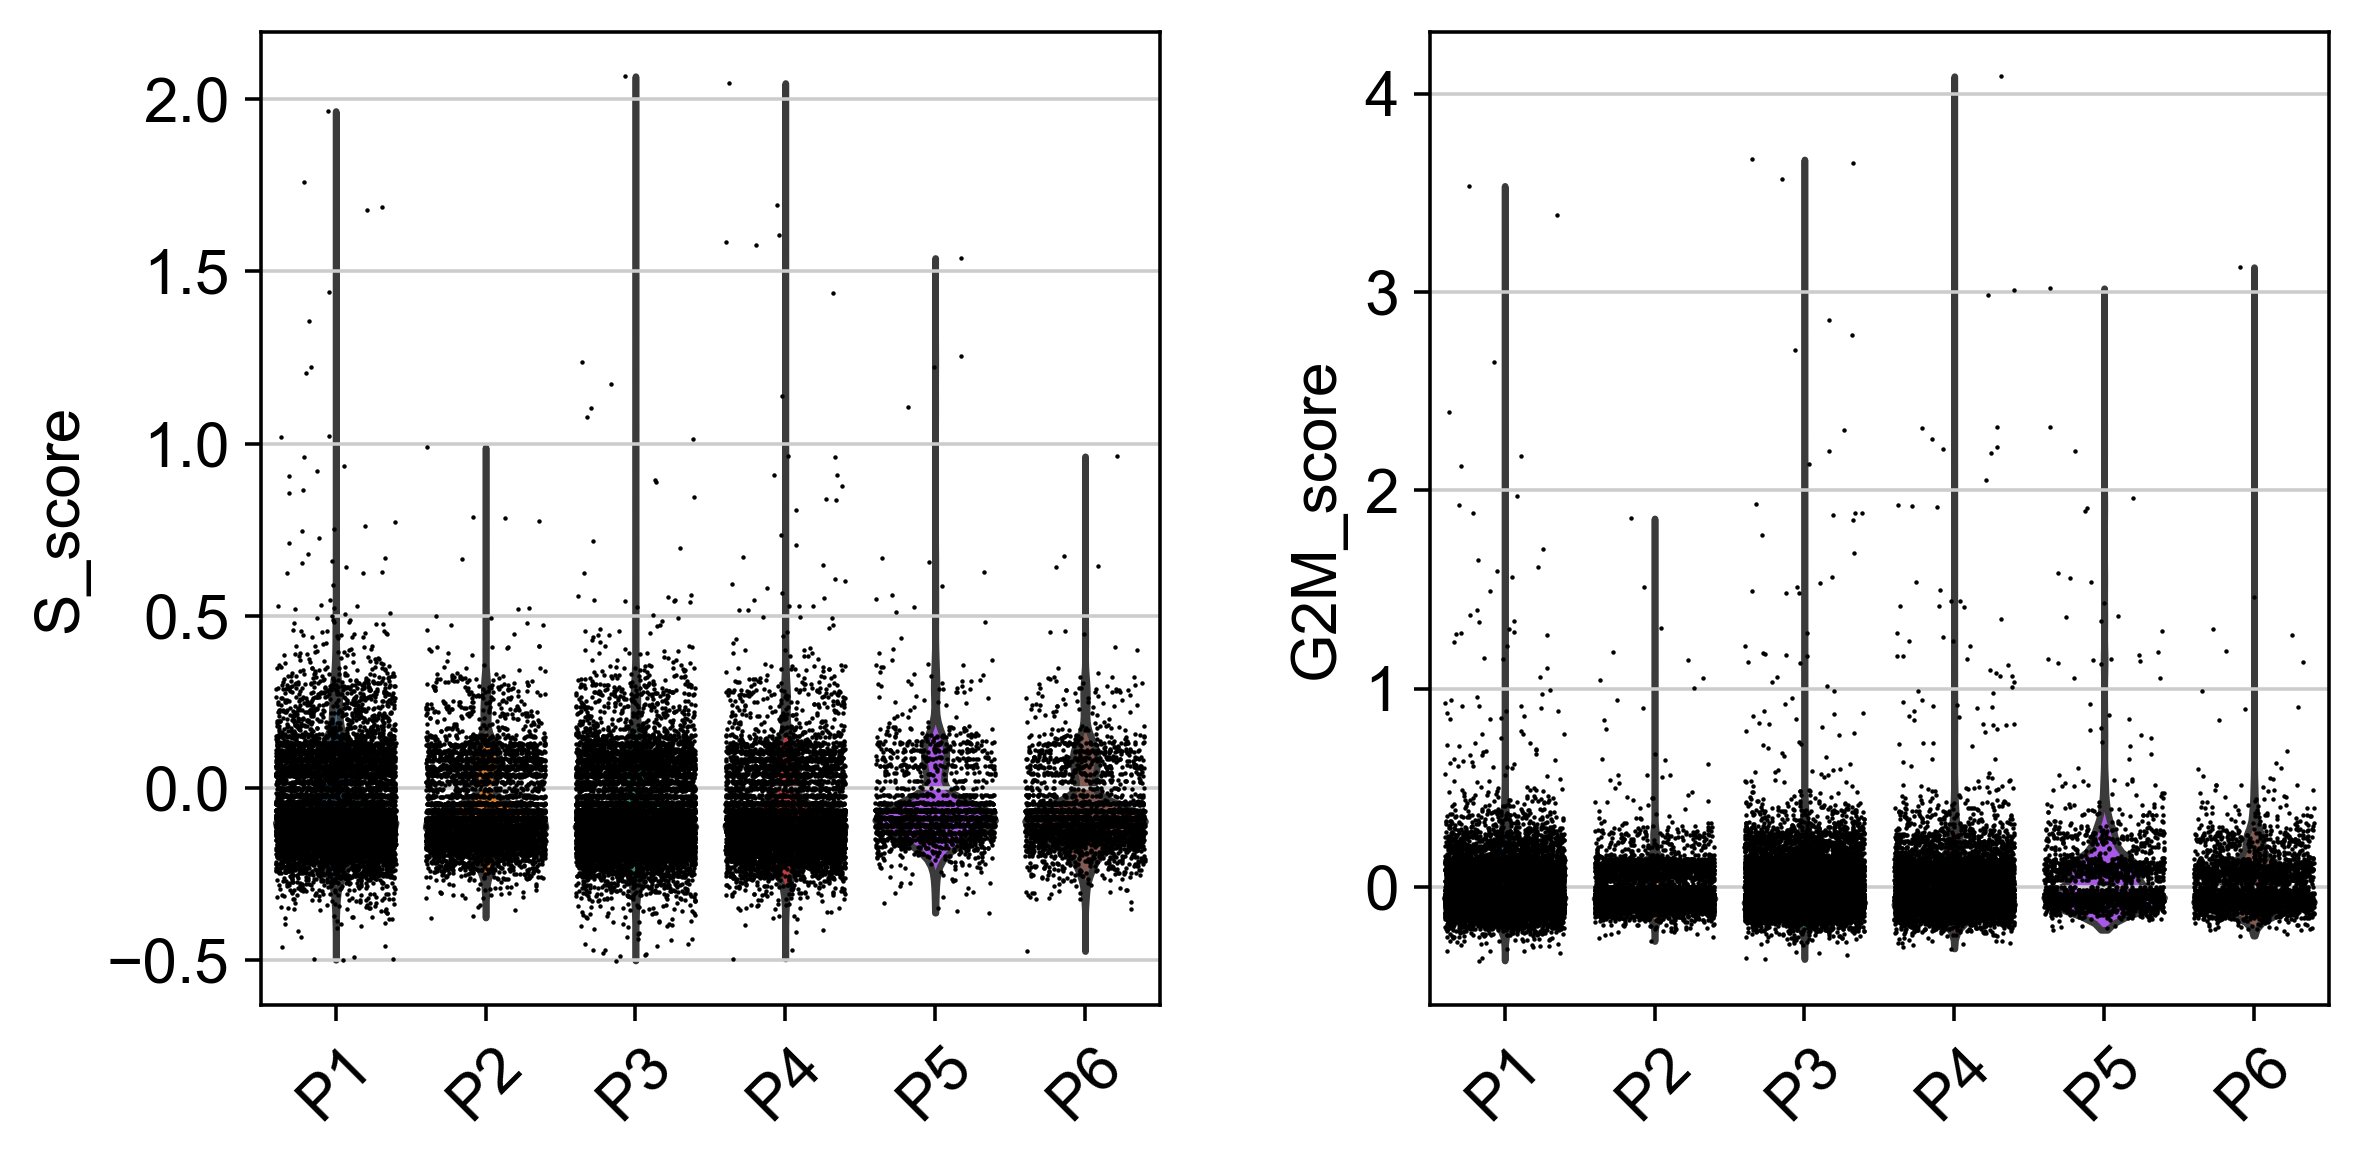

In [43]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [44]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 41143 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'tissue_colors'

### Predict doublets

In [45]:
holder = np.zeros((sample_object.shape[0],))
for smp in np.unique(sample_object.obs['sample']):
    if smp == []:
        continue
    adata_smp = sample_object[sample_object.obs['sample'] == smp]
    scrub = scr.Scrublet(adata_smp.X)
    adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
    holder[sample_object.obs['sample'] == smp] = adata_smp.obs['predicted_doublets']
sample_object.obs['predicted_doublets'] = holder

sum(sample_object.obs['predicted_doublets'])
sample_object

Preprocessing...
Simulating doublets...


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 11.3 seconds
Preprocessing...
Simulating doublets...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_73344/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 7.1 seconds
Preprocessing...
Simulating doublets...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_73344/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.07
Detected doublet rate = 59.3%
Estimated detectable doublet fraction = 74.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 80.0%
Elapsed time: 12.3 seconds
Preprocessing...
Simulating doublets...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_73344/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.05
Detected doublet rate = 85.2%
Estimated detectable doublet fraction = 91.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 92.8%
Elapsed time: 7.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_73344/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Calculating doublet scores...
Automatically set threshold at doublet score = 0.04
Detected doublet rate = 90.2%
Estimated detectable doublet fraction = 94.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 95.3%
Elapsed time: 1.8 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_73344/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 3.0 seconds


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_73344/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()


AnnData object with n_obs × n_vars = 41143 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'tissue_colors'

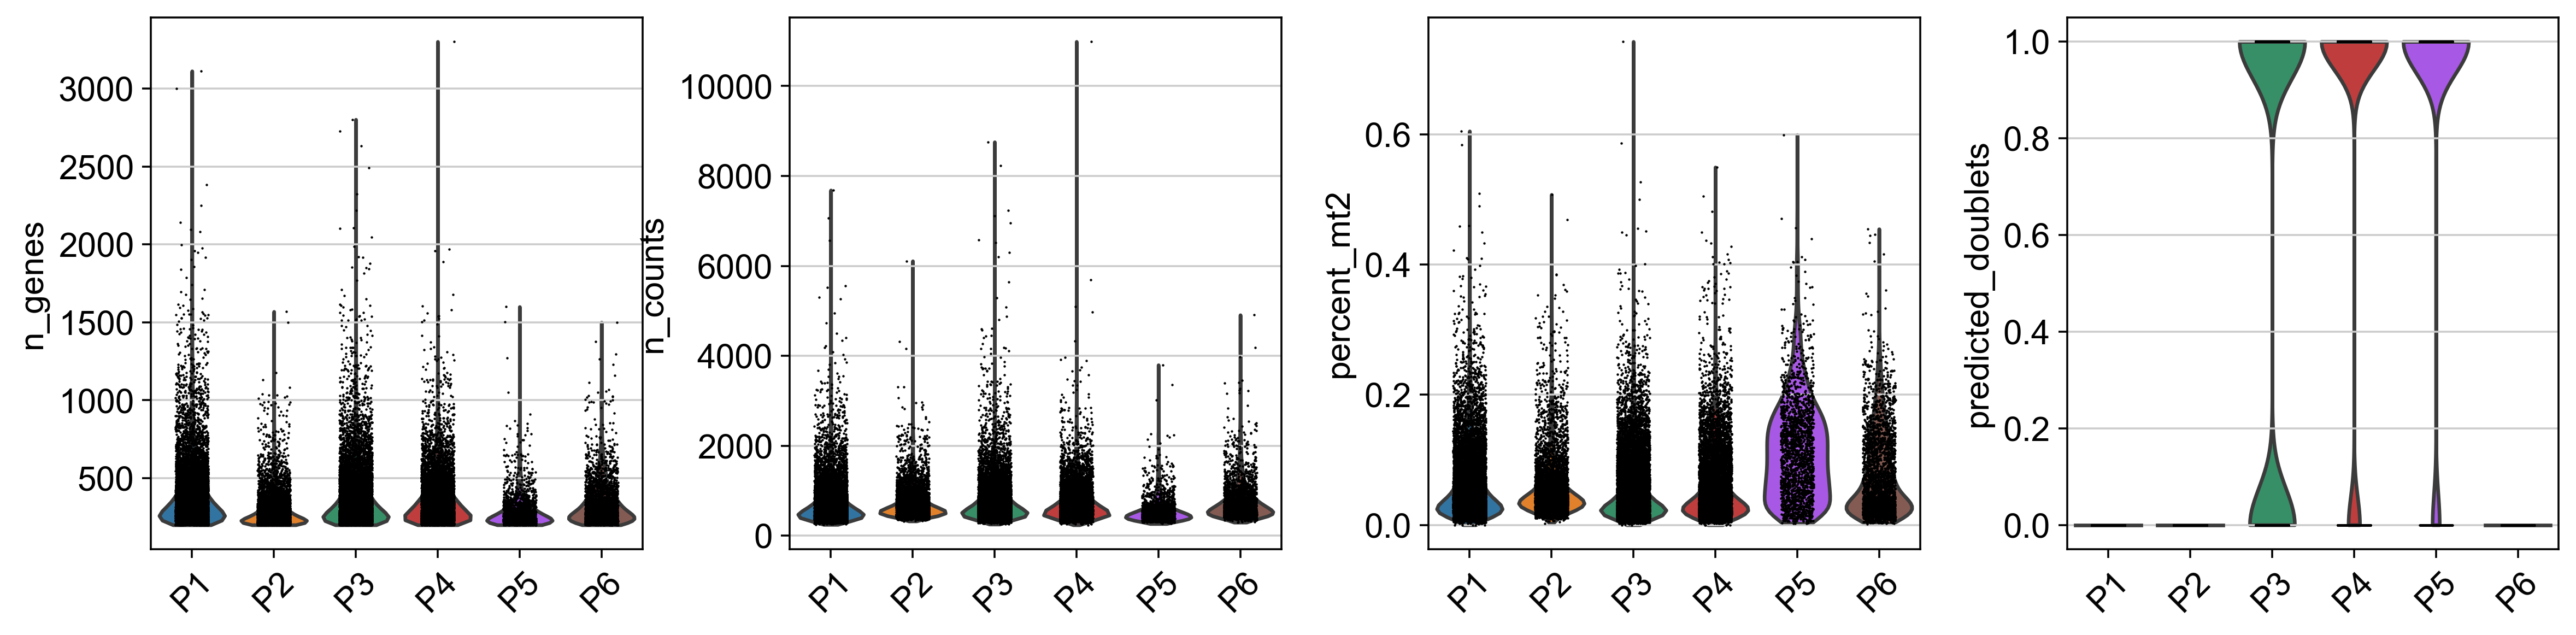

In [46]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

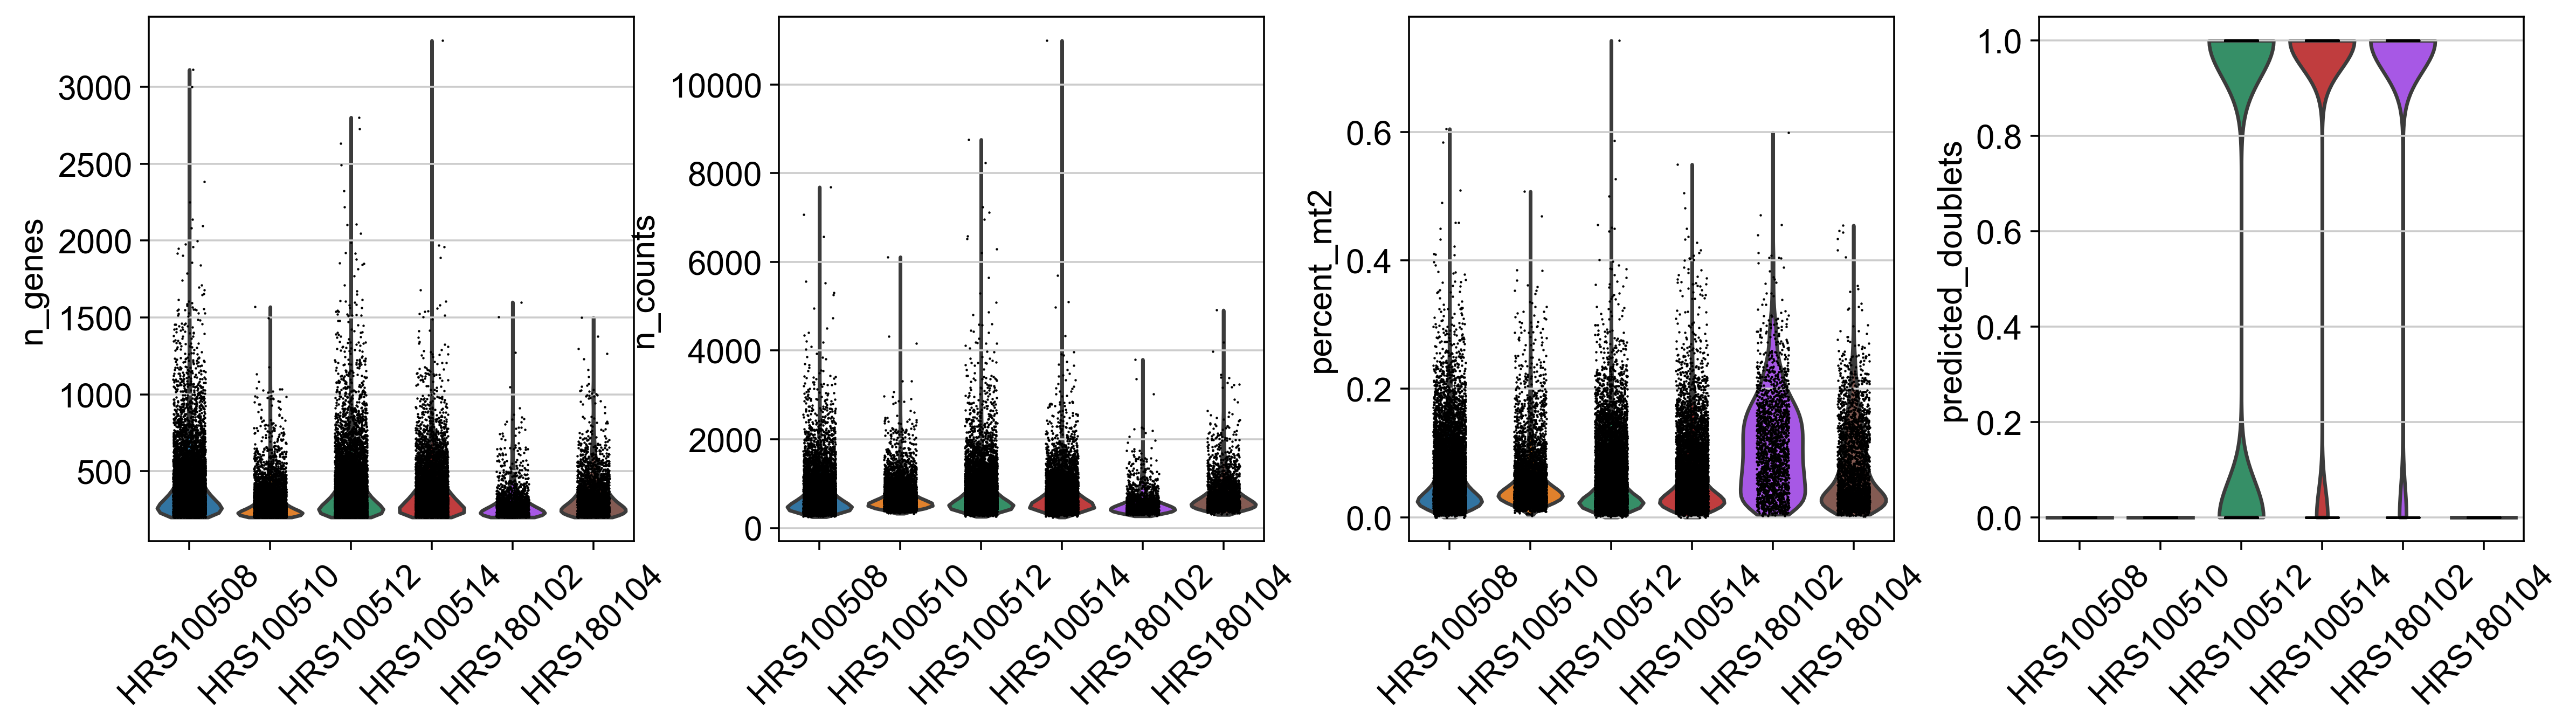

In [47]:
sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2', 'predicted_doublets'],
             jitter = 0.2, groupby = 'sample', rotation = 45)

### Density plots of n_genes, n_counts and predicted_doublets

for n_genes and n_counts, could you set limits to the x-axis?

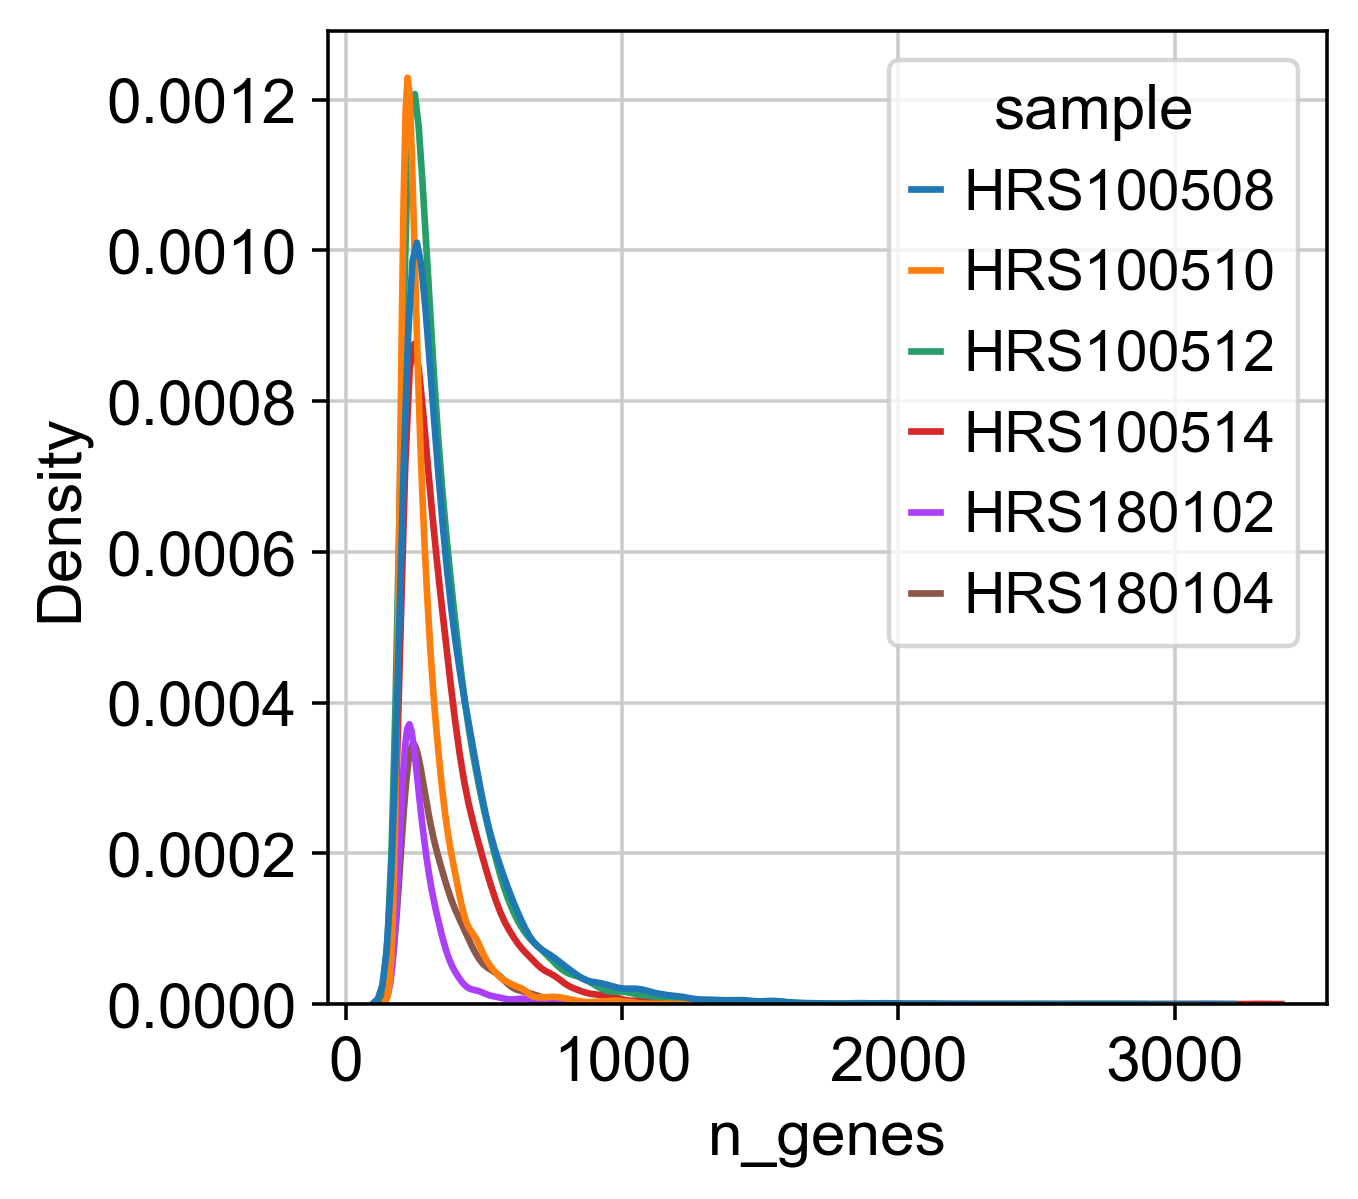

In [81]:
sb.kdeplot(data=sample_object.obs, x=sample_object.obs['n_genes'], hue="sample", log_scale=False)
plt.show()

In [79]:
plt.Axes.get_xscale

<function matplotlib.axes._base._AxesBase.get_xscale(self)>

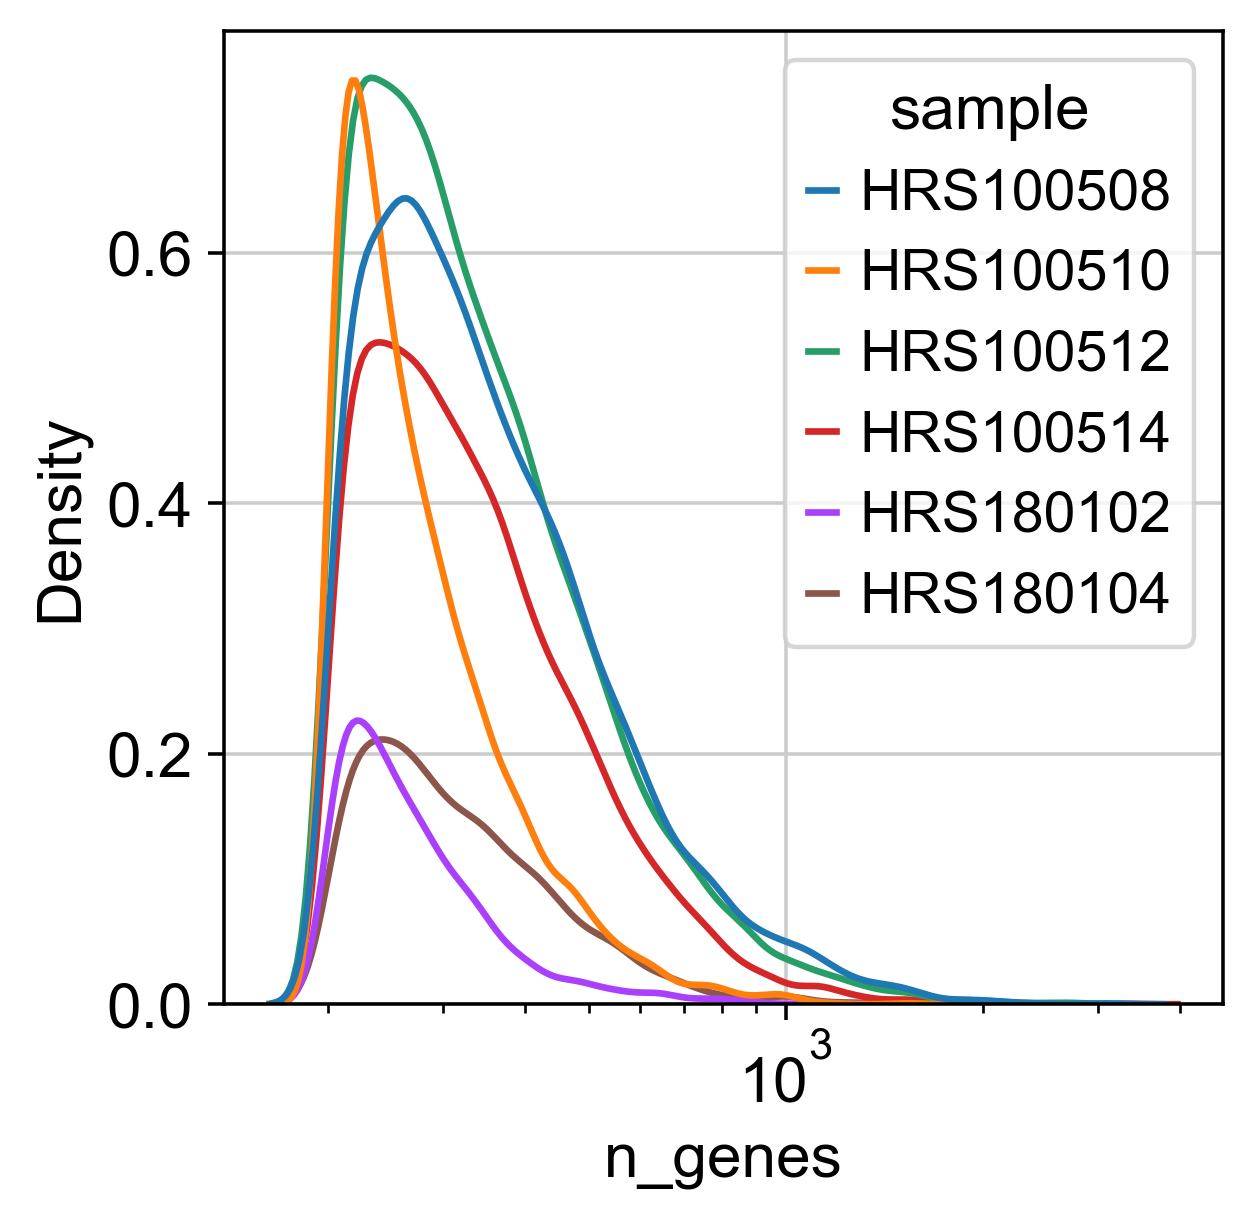

In [71]:
# Setting limits to the x-axis

sb.kdeplot(data=sample_object.obs, x=sample_object.obs['n_genes'], hue="sample", log_scale=True)
plt.show()

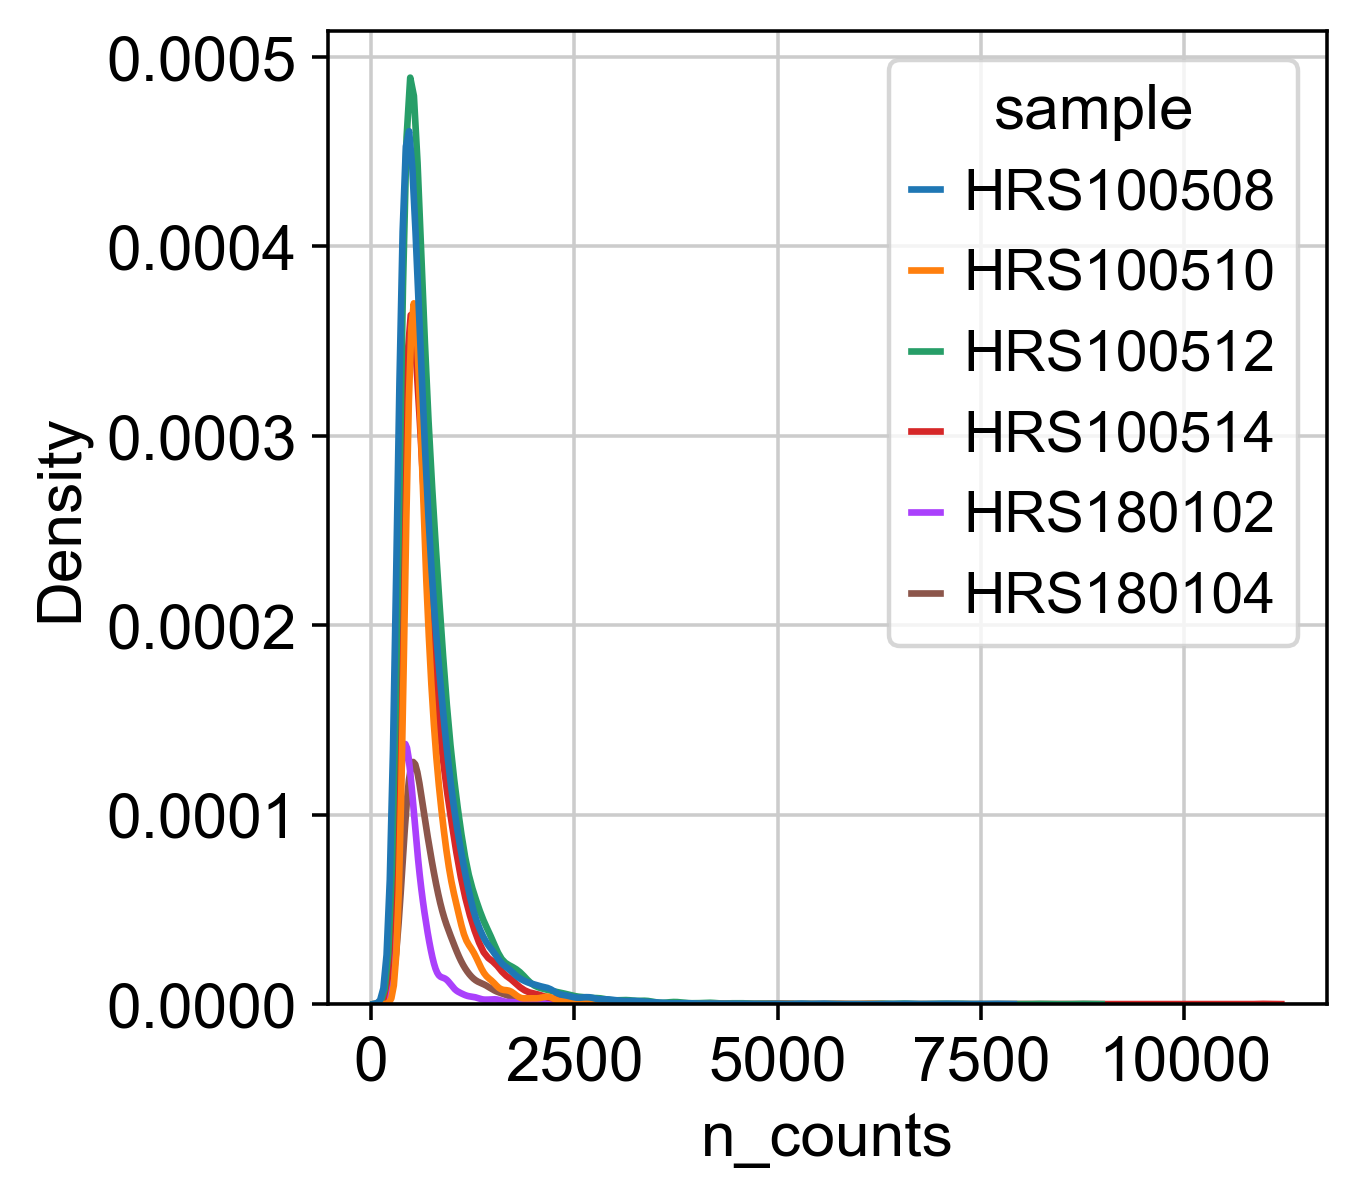

In [50]:
sb.kdeplot(data=sample_object.obs, x=sample_object.obs['n_counts'], hue="sample")
plt.show()

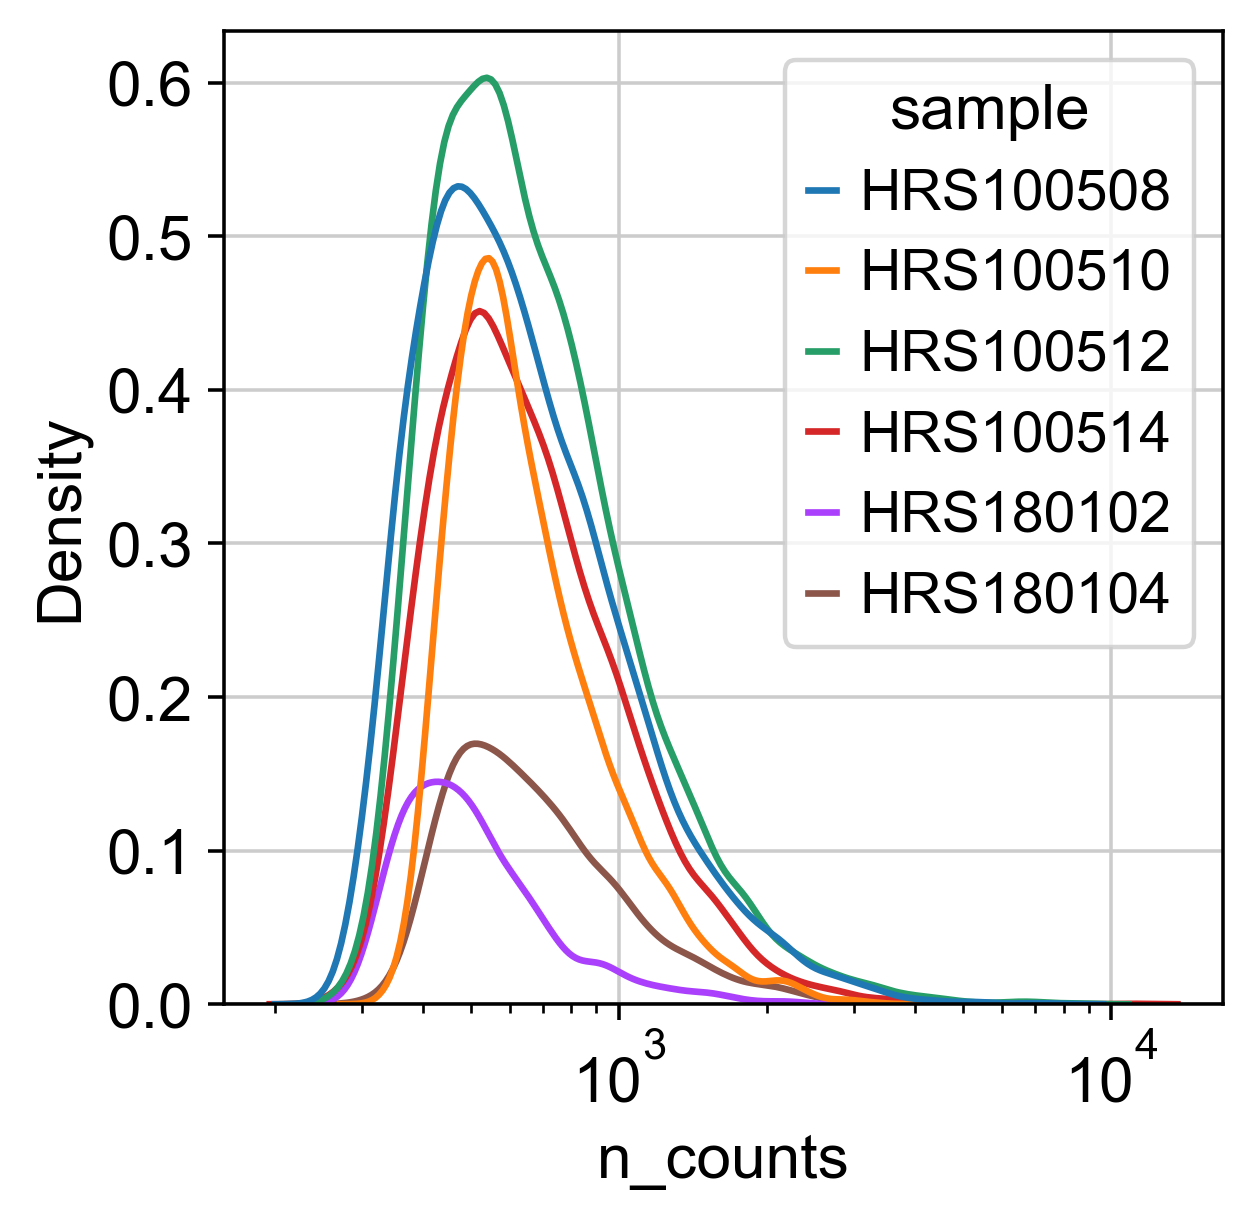

In [74]:
sb.kdeplot(data=sample_object.obs, x=sample_object.obs['n_counts'], hue="sample", log_scale=True)
plt.show()

/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_73344/2282069559.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")
/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_73344/2282069559.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")


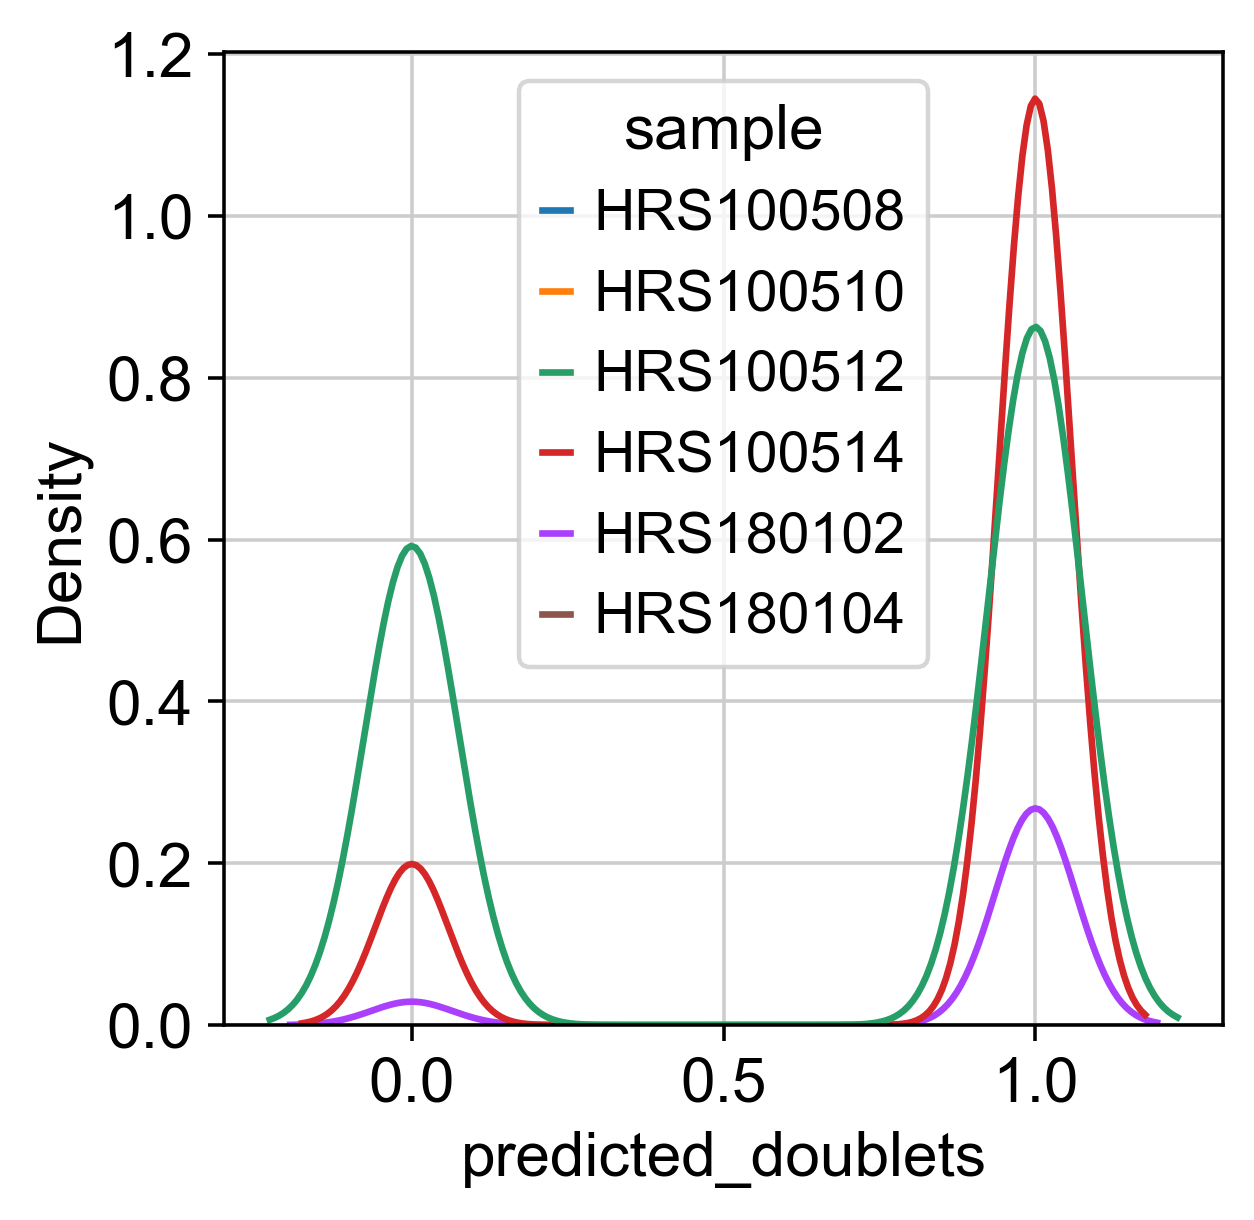

In [51]:
sb.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")
plt.show()

### Prepare counts for individual slots


In [52]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 41143 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'tissue_colors', 'sample_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [53]:
sample_object.write('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/CaiY2022_TB_PFMC_QCed_pre-process_mm221206.h5ad')